1. To detect whether the person wearing a mask or not - Binary Classification Problem
2. Deep Learning Model - Convolutional Neural Network (CNN)
3. Work Flow

    * Collect Images Data - Kaggle Dataset (API)
    * Data Pre-Processing
    * Train-Test Split
    * Deep Learning Model - Convolutional Neural Network (CNN)
    * DL Model Evaluation
    * Develop Prediction System - Feed new data to trained model to predict image of either a the person wearing mask or not.

In [ ]:
# configuring the path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dataset using API

In [ ]:
# kaggle api

!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 154M/163M [00:01<00:00, 108MB/s]
100% 163M/163M [00:01<00:00, 105MB/s]


In [ ]:
!ls

face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed file - face-mask-dataset zip file

from zipfile import ZipFile

dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1894.jpg', 'with_mask_13.jpg', 'with_mask_854.jpg', 'with_mask_2156.jpg', 'with_mask_1124.jpg']
['with_mask_3523.jpg', 'with_mask_470.jpg', 'with_mask_3230.jpg', 'with_mask_1632.jpg', 'with_mask_1512.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2699.jpg', 'without_mask_1453.jpg', 'without_mask_3504.jpg', 'without_mask_564.jpg', 'without_mask_345.jpg']
['without_mask_1432.jpg', 'without_mask_1071.jpg', 'without_mask_202.jpg', 'without_mask_3801.jpg', 'without_mask_5.jpg']


In [ ]:
print('Number of with mask images: ', len(with_mask_files))
print('Number of without mask images: ', len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


Creating Labels for the Two Class of Images

* with mask --> 1

* without mask --> 0

In [ ]:
# create the labels

with_mask_label = [1] * 3725

without_mask_label = [0] * 3828

In [ ]:
print(with_mask_label[0:5])
print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [ ]:
# combine two lists into one list

labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

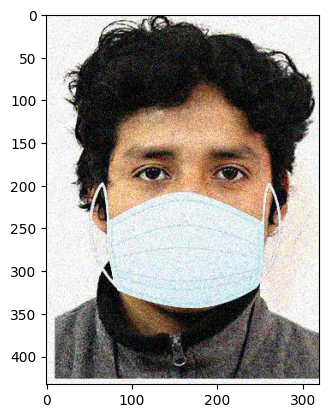

In [ ]:
# displaying with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_1894.jpg')
imgplot = plt.imshow(img)
plt.show()

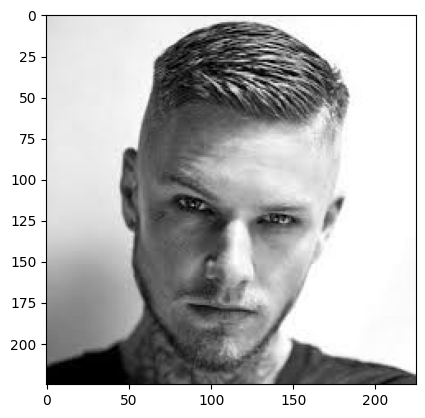

In [ ]:
# displaying without mask image

img = mpimg.imread('/content/data/without_mask/without_mask_2699.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resizing the images

2. Convert the images to numpy array

In [ ]:
# convert images to numpy array + resize the images + convert the grayscale images to RGB images

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)

  data.append(image)



without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)

  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[246, 246, 246],
        [249, 249, 249],
        [248, 248, 248],
        ...,
        [246, 247, 245],
        [243, 244, 245],
        [246, 248, 249]],

       [[248, 248, 248],
        [240, 240, 240],
        [243, 243, 243],
        ...,
        [246, 245, 244],
        [242, 240, 241],
        [247, 245, 247]],

       [[248, 248, 248],
        [244, 244, 244],
        [246, 246, 246],
        ...,
        [244, 243, 244],
        [245, 243, 244],
        [249, 246, 247]],

       ...,

       [[246, 244, 248],
        [245, 244, 246],
        [242, 243, 244],
        ...,
        [100, 100,  95],
        [ 94,  97,  90],
        [ 98, 103,  95]],

       [[244, 239, 244],
        [239, 236, 239],
        [244, 243, 244],
        ...,
        [217, 211, 212],
        [217, 212, 214],
        [217, 214, 214]],

       [[240, 241, 244],
        [244, 241, 244],
        [241, 242, 244],
        ...,
        [251, 243, 245],
        [252, 245, 250],
        [251, 245, 251]]], dtype=uint8)
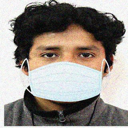

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting the image list (data) and labels list to numpy array

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train-Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


Scaling / Normalization

In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[ 72,  71,  89],
        [ 75,  74,  92],
        [ 87,  86, 104],
        ...,
        [135, 161, 187],
        [141, 167, 192],
        [142, 168, 193]],

       [[ 65,  64,  82],
        [ 85,  84, 102],
        [106, 105, 123],
        ...,
        [140, 166, 190],
        [145, 171, 195],
        [146, 172, 196]],

       [[ 68,  67,  85],
        [102, 101, 119],
        [133, 132, 150],
        ...,
        [146, 172, 195],
        [149, 175, 198],
        [150, 176, 199]],

       ...,

       [[194, 198, 244],
        [168, 171, 216],
        [187, 191, 241],
        ...,
        [242, 240, 219],
        [231, 229, 208],
        [227, 225, 205]],

       [[208, 212, 254],
        [214, 219, 255],
        [197, 201, 248],
        ...,
        [229, 227, 206],
        [232, 230, 209],
        [235, 233, 210]],

       [[150, 155, 195],
        [144, 149, 193],
        [138, 142, 191],
        ...,
        [226, 224, 203],
        [224, 222, 200],
        [226, 224, 201]]], dtype=uint8)
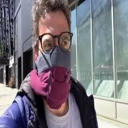

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.28235294, 0.27843137, 0.34901961],
        [0.29411765, 0.29019608, 0.36078431],
        [0.34117647, 0.3372549 , 0.40784314],
        ...,
        [0.52941176, 0.63137255, 0.73333333],
        [0.55294118, 0.65490196, 0.75294118],
        [0.55686275, 0.65882353, 0.75686275]],

       [[0.25490196, 0.25098039, 0.32156863],
        [0.33333333, 0.32941176, 0.4       ],
        [0.41568627, 0.41176471, 0.48235294],
        ...,
        [0.54901961, 0.65098039, 0.74509804],
        [0.56862745, 0.67058824, 0.76470588],
        [0.57254902, 0.6745098 , 0.76862745]],

       [[0.26666667, 0.2627451 , 0.33333333],
        [0.4       , 0.39607843, 0.46666667],
        [0.52156863, 0.51764706, 0.58823529],
        ...,
        [0.57254902, 0.6745098 , 0.76470588],
        [0.58431373, 0.68627451, 0.77647059],
        [0.58823529, 0.69019608, 0.78039216]],

       ...,

       [[0.76078431, 0.77647059, 0.95686275],
        [0.65882353, 0.67058824, 0.84705882],
        [0.73333333, 0

Model Training - Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras # keras is not a stand-alone library - keras need tensorflow/pytorch as backend library

In [ ]:
num_of_classes = 2

model = keras.Sequential()

# first conv layer
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# second conv layer
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# input layer
model.add(keras.layers.Flatten())

# first hidden layer
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# second hidden layer
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# output layer
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network (NN)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# model training

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 163s 938ms/step - acc: 0.6890 - loss: 0.7888 - val_acc: 0.8364 - val_loss: 0.3585
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - acc: 0.8651 - loss: 0.3298 - val_acc: 0.8198 - val_loss: 0.3453
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 192s 988ms/step - acc: 0.8836 - loss: 0.2819 - val_acc: 0.8942 - val_loss: 0.2266
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - acc: 0.9026 - loss: 0.2489 - val_acc: 0.8992 - val_loss: 0.2081
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 162s 951ms/step - acc: 0.9015 - loss: 0.2175 - val_acc: 0.9058 - val_loss: 0.1950


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - acc: 0.9125 - loss: 0.2297
Test accuracy =  0.9159497022628784


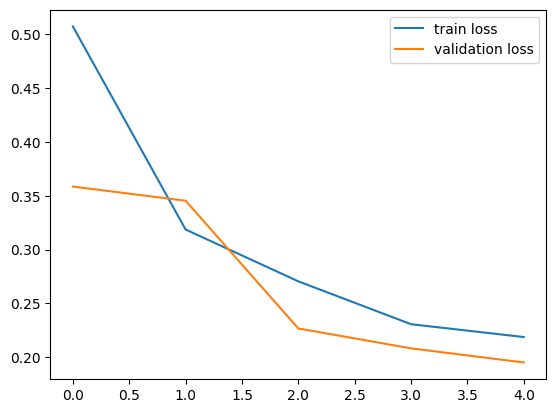

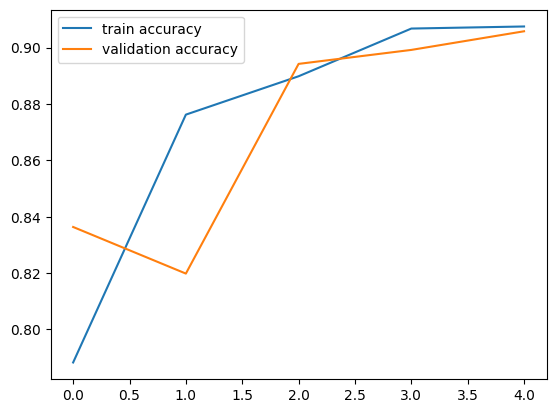

In [ ]:
# visualizing the loss and accuracy

h = history

# plot the loss value

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:
  print('The person is wearing a mask')

else:
  print('The person is not wearing a mask')